# Navagate Financial Data with Alpha Vantage

In [1]:
import os
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import pandas as pd
from config import API_KEY
import numpy as np

In [2]:
# Access your API key from the environment variables
api_key = API_KEY

            1. open  2. high  3. low  4. close  5. adjusted close  \
date                                                                
2024-04-23   400.08   408.20  395.75    407.57             407.57   
2024-04-19   426.60   426.82  397.77    399.12             399.12   
2024-04-12   425.17   429.37  419.70    421.90             421.90   
2024-04-05   423.95   428.67  417.57    425.52             425.52   
2024-03-28   425.24   427.41  419.01    420.72             420.72   

              6. volume  7. dividend amount  
date                                         
2024-04-23   35283062.0                 0.0  
2024-04-19  104490345.0                 0.0  
2024-04-12   80153656.0                 0.0  
2024-04-05   85744235.0                 0.0  
2024-03-28   73362236.0                 0.0  


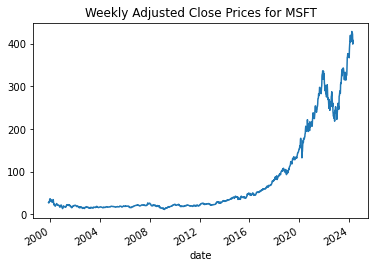

In [3]:
# Sample Plot
ts = TimeSeries(key=api_key, output_format='pandas')

# Get weekly adjusted close prices for Microsoft (MSFT). The function returns a tuple,
# where the first element is the dataframe containing the timeseries data
data, meta_data = ts.get_weekly_adjusted(symbol='MSFT')

# Print the data
print(data.head())

# Plot the adjusted closing prices
data['5. adjusted close'].plot()
plt.title('Weekly Adjusted Close Prices for MSFT')
plt.show()

## Fetching Multiple ETFs

In [4]:
# Symbols for the ETFs
symbols = ['VOO', 'VGT', 'VHT', 'VFH', 'VDE', 'VCR', 'VDC']

# Dictionary to hold data
etf_data = {}   

# Fetch data for each symbol
for symbol in symbols:
    data, _ = ts.get_weekly_adjusted(symbol=symbol)
    etf_data[symbol] = data

# Dictionary to hold adjusted close data
adjusted_close_data = {}

# Extract '5. adjusted close' from each DataFrame
for symbol, df in etf_data.items():
    adjusted_close_data[symbol] = df['5. adjusted close']

# Create a single DataFrame from the extracted data
combined_data = pd.DataFrame(adjusted_close_data)

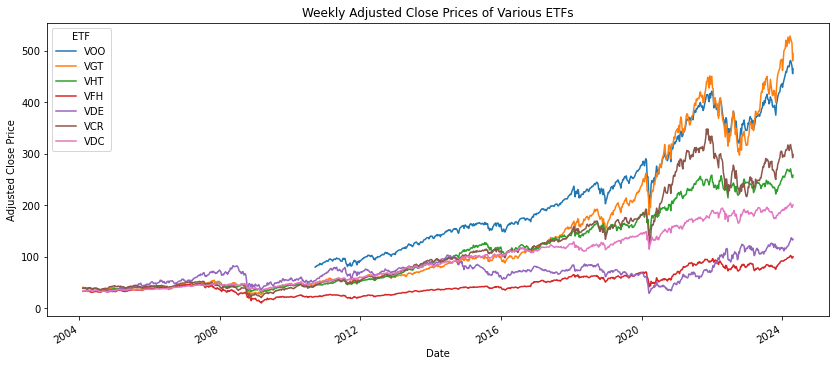

In [5]:
# Now you can plot this DataFrame or perform other analysis
combined_data.plot(figsize=(14, 6))
plt.title('Weekly Adjusted Close Prices of Various ETFs')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(title='ETF')
plt.show()

## Filter Data by Date

In [6]:
min_dates = {}

for column in combined_data.columns:
    # Drop all NaN values and then get the first index (date) of the remaining DataFrame
    min_date = combined_data[column].dropna().index[0]
    min_dates[column] = min_date

# Convert the dictionary to a DataFrame for a nicer display
min_dates_df = pd.DataFrame(list(min_dates.items()), columns=['ETF', 'Earliest Date'])

print(min_dates_df)

   ETF Earliest Date
0  VOO    2010-09-17
1  VGT    2004-02-06
2  VHT    2004-02-06
3  VFH    2004-02-06
4  VDE    2004-10-08
5  VCR    2004-02-06
6  VDC    2004-02-06


In [7]:
combined_prices_filtered = combined_data['2010-09-17':]

In [8]:
combined_prices_filtered.head()

,VOO,VGT,VHT,VFH,VDE,VCR,VDC
date,,,,,,,
2010-09-17,79.6922,46.7897,43.6088,22.5703,52.9278,43.7871,49.1465
2010-09-24,81.2635,48.1987,44.6213,22.6289,54.2164,45.0945,49.9628
2010-10-01,81.1705,48.0604,44.5396,22.5082,55.7079,45.1028,49.8573
2010-10-08,82.6895,48.5898,44.9234,22.8098,57.2243,46.2342,50.3006
2010-10-15,83.3718,50.3510,45.4296,22.4328,58.1088,46.7035,51.0831


## Normalize Data

In [9]:
# Normalize the prices to start at 100
normalized_prices = combined_prices_filtered / combined_prices_filtered.iloc[0] * 100

In [10]:
normalized_prices.head()

,VOO,VGT,VHT,VFH,VDE,VCR,VDC
date,,,,,,,
2010-09-17,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2010-09-24,101.971711,103.011347,102.321779,100.259633,102.434637,102.985811,101.660952
2010-10-01,101.855012,102.715769,102.134432,99.724860,105.252627,103.004766,101.446288
2010-10-08,103.761096,103.847214,103.014529,101.061129,108.117662,105.588632,102.348285
2010-10-15,104.617265,107.611291,104.175304,99.390792,109.788807,106.660409,103.940464


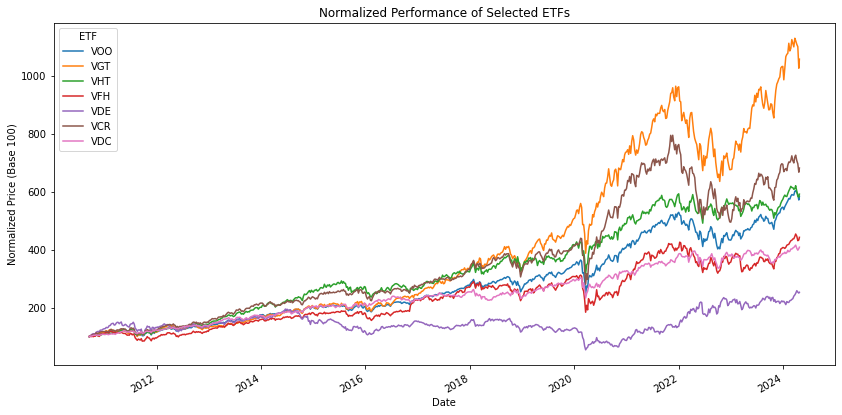

In [11]:
# Plot the normalized prices
normalized_prices.plot(figsize=(14, 7))  # You can adjust the figure size as desired
plt.title('Normalized Performance of Selected ETFs')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Base 100)')
plt.legend(title='ETF')
plt.show()

In [12]:
# Calculate percentage growth from the start
percentage_growth = (combined_prices_filtered / combined_prices_filtered.iloc[0] - 1) * 100

final_growth_percentage = percentage_growth.iloc[-1]

In [13]:
percentage_growth.head()

,VOO,VGT,VHT,VFH,VDE,VCR,VDC
date,,,,,,,
2010-09-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-09-24,1.971711,3.011347,2.321779,0.259633,2.434637,2.985811,1.660952
2010-10-01,1.855012,2.715769,2.134432,-0.275140,5.252627,3.004766,1.446288
2010-10-08,3.761096,3.847214,3.014529,1.061129,8.117662,5.588632,2.348285
2010-10-15,4.617265,7.611291,4.175304,-0.609208,9.788807,6.660409,3.940464


In [14]:
final_growth_percentage

VOO    483.294225
VGT    956.749669
VHT    491.210948
VFH    342.262619
VDE    152.627164
VCR    581.250871
VDC    308.208112
Name: 2024-04-23 00:00:00, dtype: float64

In [15]:
summary_table = pd.DataFrame(final_growth_percentage)

In [16]:
summary_table = pd.DataFrame(final_growth_percentage).reset_index()
summary_table.columns = ['ETF', 'Final Growth (%)']

In [17]:
print(summary_table)

   ETF  Final Growth (%)
0  VOO        483.294225
1  VGT        956.749669
2  VHT        491.210948
3  VFH        342.262619
4  VDE        152.627164
5  VCR        581.250871
6  VDC        308.208112


## Measure Volatility

In [18]:
volatility = combined_prices_filtered.pct_change().std() * np.sqrt(52)  # Annualize weekly volatility

In [19]:
volatility

VOO    0.161762
VGT    0.200285
VHT    0.162464
VFH    0.212758
VDE    0.277106
VCR    0.201573
VDC    0.132335
dtype: float64

Tech and Energy Sectors the most volatile

## Sharpie Ratios

In [20]:
returns = combined_prices_filtered.pct_change()

In [21]:
rf = 0.01  # Example risk-free rate of 1%
annual_returns = returns.mean() * 52  # Annualize the weekly returns
sharpe_ratios = (annual_returns - rf) / volatility

In [22]:
sharpe_ratios

VOO    0.819007
VGT    0.913960
VHT    0.822133
VFH    0.571981
VDE    0.349678
VCR    0.749384
VDC    0.770378
dtype: float64

A higher Sharpe ratio indicates a more desirable risk-adjusted return. Essentially, it tells investors how much excess return they are receiving for the extra volatility that they endure for holding a riskier asset.

## Betas

In [23]:
weekly_returns = combined_prices_filtered.pct_change()

In [24]:
weekly_returns.head()

,VOO,VGT,VHT,VFH,VDE,VCR,VDC
date,,,,,,,
2010-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-24,0.019717,0.030113,0.023218,0.002596,0.024346,0.029858,0.016610
2010-10-01,-0.001144,-0.002869,-0.001831,-0.005334,0.027510,0.000184,-0.002112
2010-10-08,0.018714,0.011015,0.008617,0.013400,0.027221,0.025085,0.008891
2010-10-15,0.008251,0.036246,0.011268,-0.016528,0.015457,0.010150,0.015556


In [26]:
# Calculate the covariance of each ETF with VOO
covariance = weekly_returns.cov()

# Calculate the variance of VOO (market)
variance = weekly_returns['VOO'].var()

# Calculate Beta for each ETF by dividing their covariance with the market by the market's variance
betas = covariance['VOO'] / variance

# Remove the Beta value for VOO itself, as we're only interested in the ETFs relative to the market
betas = betas.drop('VOO')


In [27]:
betas

VGT    1.135430
VHT    0.842376
VFH    1.149673
VDE    1.121139
VCR    1.143499
VDC    0.642718
Name: VOO, dtype: float64

Beta measures the sensitivity of a security’s returns relative to the returns of a benchmark index. A beta of 1 means that the security’s price tends to move with the market. A beta greater than 1 indicates greater volatility than the market, and a beta less than 1 indicates less.